# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import zCurve as z
import numpy as np

OFFSET = 10
#OFFSET= 50000
FACTOR_MULTIPLY = 10000

df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-30.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/SteeringWheelAngle-30.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)
df = df.iloc[142:192]

df
################ ADJUSTING SENSORS BEFORE ADDING OFFSET AND FAKTOR MULTIPLY ###################
# Issue where negative values still remain
#for index, row in df.iterrows():
 #   accel_lat = row['IMULatAcceleration']
  #  if accel_lat > 0:
   #     df.at[index, 'IMULatAcceleration'] = accel_lat + 5
    #elif accel_lat < 0:
     #   df.at[index, 'IMULatAcceleration'] = accel_lat - 5

#df
df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

print(df['IMULatAcceleration'].min())

################ ADDING OFFSET AND FAKTOR MUTLIPLY BEFORE ADJUSTING SENSORS ###################
# Check which values are decreasing and increasing to know when to add or subtract after offset and factor multiply.
#positive_or_negative = df['IMULatAcceleration'] > 0

#df = df.assign(IMULatSign=np.where(positive_or_negative, 'positive', 'negative'))


#df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
#df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
#df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

#df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
#df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)

#for index, row in df.iterrows():
 #   accel_lat = row['IMULatAcceleration']
 #   isSignPositive = row['IMULatSign'] == 'positive'
 #   if isSignPositive:
 #       df.at[index, 'IMULatAcceleration'] = accel_lat + ( (5 + OFFSET)*FACTOR_MULTIPLY)
 #   else:
   #     df.at[index, 'IMULatAcceleration'] = accel_lat - ( (5 + OFFSET)*FACTOR_MULTIPLY)
#
df

54525


,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,SteeringWhlAngle
142,1663765148,298291,1663765148,298324,1663765148,298242,101275,125755,9.4860,1663765148298242,1663765148,290105,1663765148,290127,1663765148,290055,99531
143,1663765148,398378,1663765148,398402,1663765148,398330,97365,126180,9.8175,1663765148398330,1663765148,390267,1663765148,390289,1663765148,390222,99550
144,1663765148,497879,1663765148,497903,1663765148,497829,100595,126435,9.8515,1663765148497829,1663765148,490297,1663765148,490319,1663765148,490251,99589
145,1663765148,598268,1663765148,598293,1663765148,598219,98385,120485,9.7495,1663765148598219,1663765148,590142,1663765148,590164,1663765148,590093,99599
146,1663765148,698388,1663765148,698412,1663765148,698338,101275,108585,9.7240,1663765148698338,1663765148,690294,1663765148,690316,1663765148,690249,99589
147,1663765148,797854,1663765148,797878,1663765148,797811,98895,105015,9.8090,1663765148797811,1663765148,790301,1663765148,790323,1663765148,790257,99589
148,1663765148,898331,1663765148,898355,1663765148,898280,101530,103315,9.6645,1663765148898280,1663765148,890213,1663765148,890235,1663765148,890164,99589
149,1663765148,998376,1663765148,998400,1663765148,998329,100425,99745,9.7835,1663765148998329,1663765148,990287,1663765148,990308,1663765148,990243,99677
150,1663765149,97895,1663765149,97919,1663765149,97846,100085,100765,9.6645,1663765149097846,1663765149,90292,1663765149,90313,1663765149,90246,99687
151,1663765149,198344,1663765149,198374,1663765149,198280,100254,100425,9.6815,1663765149198280,1663765149,190115,1663765149,190137,1663765149,190070,99687


### Adjusting sensor values

### Morton Indexing

In [130]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))


df['morton'] = df.apply(set_value, axis=1)
#tmp_frame = df[['IMULatAcceleration', 'SteeringWhlAngle']]
#df_numpy = tmp_frame.to_numpy()
#df_list = df_numpy.tolist()
#morton_codes = z.par_interlace(df_list, dims=2, bits_per_dim=18)
#morton_frame = pd.DataFrame(morton_codes, columns=['morton'])
#df['morton'] = morton_frame['morton']

df


,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,SteeringWhlAngle,morton
142,1663765148,298291,1663765148,298324,1663765148,298242,101275,125755,9.4860,1663765148298242,1663765148,290105,1663765148,290127,1663765148,290055,99531,16112804303
143,1663765148,398378,1663765148,398402,1663765148,398330,97365,126180,9.8175,1663765148398330,1663765148,390267,1663765148,390289,1663765148,390222,99550,15392093113
144,1663765148,497879,1663765148,497903,1663765148,497829,100595,126435,9.8515,1663765148497829,1663765148,490297,1663765148,490319,1663765148,490251,99589,16112571687
145,1663765148,598268,1663765148,598293,1663765148,598219,98385,120485,9.7495,1663765148598219,1663765148,590142,1663765148,590164,1663765148,590093,99599,16108360107
146,1663765148,698388,1663765148,698412,1663765148,698338,101275,108585,9.7240,1663765148698338,1663765148,690294,1663765148,690316,1663765148,690249,99589,16112894311
147,1663765148,797854,1663765148,797878,1663765148,797811,98895,105015,9.8090,1663765148797811,1663765148,790301,1663765148,790323,1663765148,790257,99589,16108621943
148,1663765148,898331,1663765148,898355,1663765148,898280,101530,103315,9.6645,1663765148898280,1663765148,890213,1663765148,890235,1663765148,890164,99589,16113615206
149,1663765148,998376,1663765148,998400,1663765148,998329,100425,99745,9.7835,1663765148998329,1663765148,990287,1663765148,990308,1663765148,990243,99677,16112562915
150,1663765149,97895,1663765149,97919,1663765149,97846,100085,100765,9.6645,1663765149097846,1663765149,90292,1663765149,90313,1663765149,90246,99687,16109698363
151,1663765149,198344,1663765149,198374,1663765149,198280,100254,100425,9.6815,1663765149198280,1663765149,190115,1663765149,190137,1663765149,190070,99687,16109758846


In [131]:
morton_values = df['morton']
#morton_values
#print(morton_values[0])
#print(morton_values[129])
#print(morton_values.min())
#print(morton_values.max())

'''
We could try to generate all morton values between min and max of the morton values
(corresponding to the limits of the statespace). But, this may not correspond to varying the accel_lat parameter.
Hence, we need to permutate the speed paramter, such that the morton value can realisticly represent a lane change accel_lat.
Hence, we want to find the boundaires of the acccel_lat parameter in tandem with steering angle.

The question then remains: Can we really only vary speed? Would we have to fixate/decide on some constant steering wheel angle
to simplify the problem at hand?
'''

'\nWe could try to generate all morton values between min and max of the morton values\n(corresponding to the limits of the statespace). But, this may not correspond to varying the accel_lat parameter.\nHence, we need to permutate the speed paramter, such that the morton value can realisticly represent a lane change accel_lat.\nHence, we want to find the boundaires of the acccel_lat parameter in tandem with steering angle.\n\nThe question then remains: Can we really only vary speed? Would we have to fixate/decide on some constant steering wheel angle\nto simplify the problem at hand?\n'

## Impact of modifying value prior to Morton encoding to Morton value

In [13]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

steer_ang = 64941
lat_accel = 78410

#morton_value = m.pack(78410, 64941)
#print(morton_value)

for i in range(0, 10):
    print('i: ', i, ' | mort: ', m.pack(lat_accel+i**2, steer_ang))
    
print('-------------------------')

for i in range(0, 10):
    print('i: ', i, ' | mort: ', m.pack(lat_accel+i, steer_ang))
    
values = m.unpack(7241898219) 
print(values)
# [78410, 64941] - 7241898214; 
# [78411, 64941] - 7241898215
# [78408, 64942] - 7241898216
# [78409, 64942] - 7241898217
# [78408, 64943] - 7241898218
# [78409, 64943] - 7241898219
print(m.pack(78408, 64943))
print(m.pack(78409, 64943))


#10011001001001011
#10011001001001000

# df['morton'] = df.apply(set_value, axis=1)


i:  0  | mort:  7241898214
i:  1  | mort:  7241898215
i:  2  | mort:  7241898230
i:  3  | mort:  7241898407
i:  4  | mort:  7241898470
i:  5  | mort:  7241899175
i:  6  | mort:  7241899254
i:  7  | mort:  7241899495
i:  8  | mort:  7241910502
i:  9  | mort:  7241910759
-------------------------
i:  0  | mort:  7241898214
i:  1  | mort:  7241898215
i:  2  | mort:  7241898226
i:  3  | mort:  7241898227
i:  4  | mort:  7241898230
i:  5  | mort:  7241898231
i:  6  | mort:  7241898402
i:  7  | mort:  7241898403
i:  8  | mort:  7241898406
i:  9  | mort:  7241898407
[78409, 64943]
7241898218
7241898219


### Visualizations

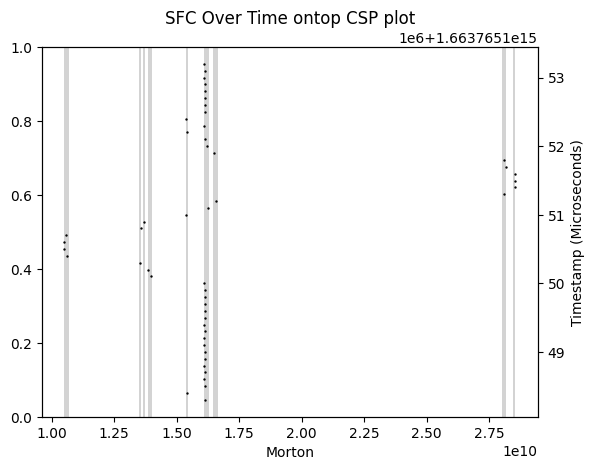

In [133]:
fig, ax = plt.subplots()

ax.hist(df['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
#ax.set_xlim([0, 40000000000])

ax2 = ax.twinx()

ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Morton')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')

plt.show()

<Axes: xlabel='ts'>

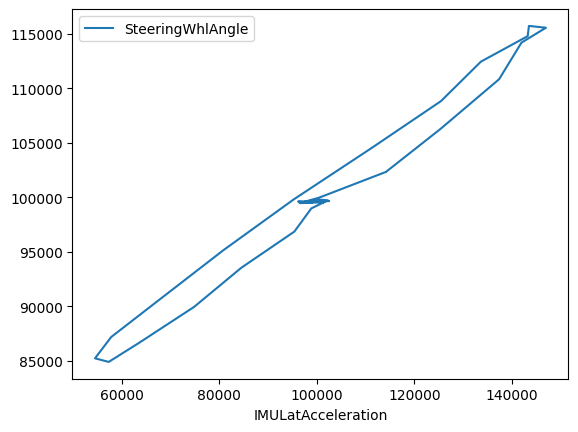

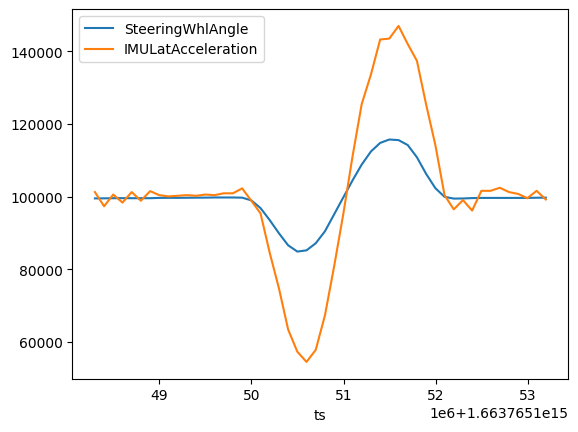

In [134]:
# Plot result
df.plot(x = 'IMULatAcceleration', y = 'SteeringWhlAngle')
df.plot(x = 'ts', y = ['SteeringWhlAngle', 'IMULatAcceleration'])